
The cost method selected servers are: ['5', '13', '22']
Average player to server delay: 13.19
Minimum player to server delay: 0.46
Maximum player to server delay: 26.37

Average interplayer delay: 27.12
Maximum interplayer delay: ('P7', 'P39', 51.527626062412814)
Minimum interplayer delay: ('P21', 'P43', 2.992052041000611)


True

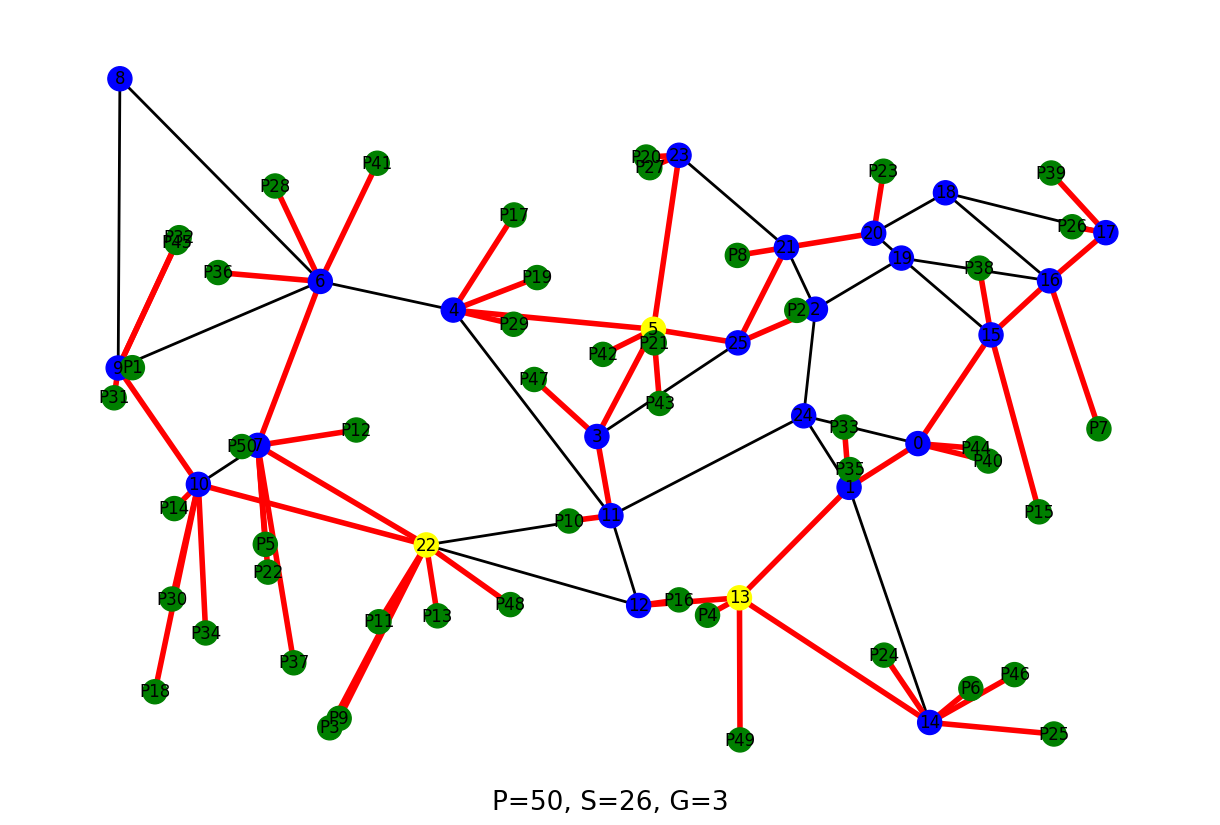

In [50]:
from visualization import *
from network_graph import *

timestamp = '20240504202421'

save_dir = '/Users/ebenbot/Documents/University/cloud_work/saves/'
save_path = save_dir + timestamp + '/'
file_path = save_path+"cost_GEN_SUM_100/" + "cost_GEN_SUM_100_5_6_20" + ".gml"

#file_path = 'saves/20240504202421/cost_GEN_SUM_100/cost_GEN_SUM_100_5_6_20.gml'
file_path = 'saves/20240506182314_cost/cost_gen_sum_ipd_100/cost_gen_sum_ipd_100_24_6_20.gml'
file_path = 'saves/20240531174858_usa/usa_gen_sum_50/usa_gen_sum_50_3_4_25.gml'
draw_graph_from_gml(file_path, 'P=50, S=26, G=3', node_size=300, edge_width_factor=2.0, figsize=(12, 8))

network=NetworkGraph()
network.load_topology(file_path)

network.calculate_player_server_connections_from_gml()
method_type = 'cost'
network.calculate_delays(method_type=method_type, debug_prints=True)

In [ ]:
from visualization import *
from network_graph import *

config_file = "/Users/ebenbot/Documents/University/cloud_work/genconfig.ini"
config = read_configuration(config_file)
save_dir = get_save_dir(config)
_, _, _, active_models = get_toggles_from_genconfig(config)


#csv_file_name = 'ga20240507100255_germany/germany_100.0_20240507100255.csv' #mutation
#csv_file_name = 'ga20240507102345_germany/germany_100.0_20240507102345.csv' #generation
#csv_file_name = 'ga20240507110011_germany/germany_100.0_20240507110011.csv' #tournament_size also change genconfig.ini for active models!
#csv_file_name = 'ga20240507113522_germany/germany_500.0_20240507113522.csv' #same tests
csv_file_name = 'ga20240515084052_germany/germany_500.0_20240515084052.csv' #same tests with roulette too

df_results = pd.read_csv(save_dir + csv_file_name, comment='#')

In [ ]:
draw_ga_compare_plot(*active_models, df=df_results, x='mutation_rate', x_label='Mutation rate',
                    plot_type='average_player_to_player_delay_', y_label='Avg. player to player delay [ms]',
                    title='Avg. Player to player delay vs mut. rate', invert=True)

In [ ]:
draw_ga_compare_plot(*active_models, df=df_results, x='mutation_rate', x_label='Mutation rate',
                  plot_type='qoe_score_', y_label='QoE', title='QoE comparison')

In [ ]:
draw_ga_compare_plot(*active_models, df=df_results, x='mutation_rate', x_label='Mutation rate',
                  plot_type='average_player_to_server_delay_', y_label='Avg. Player-to-Server Delay [ms]',
                  title='Average Player-to-Server Delay Comparison', invert=True)

In [ ]:
draw_ga_compare_plot(*active_models, df=df_results, x='mutation_rate', x_label='Nr. of game servers',
                  plot_type='average_player_to_player_delay_', y_label='Avg. Player-to-Player Delay [ms]',
                  title='Average Player-to-Player Delay Comparison')

In [ ]:
draw_ga_compare_plot(*active_models, df=df_results, x='generation_size', x_label='Generations',
                    plot_type='average_player_to_player_delay_', y_label='Avg. player to player delay [ms]',
                    title='Avg. Player to player delay vs mut. rate', invert=False)

In [ ]:
draw_ga_compare_plot(*active_models, df=df_results, x='generation_size', x_label='Generations',
                    plot_type='sim_time_', y_label='',
                    title='', invert=False)

In [ ]:
draw_ga_compare_plot(*active_models, df=df_results, x='generation_size', x_label='Generations',
                  plot_type='qoe_score_', y_label='QoE', title='QoE comparison', invert=False)

In [ ]:
draw_ga_compare_plot(*active_models, df=df_results, x='tournament_size', x_label='Tournament size',
                    plot_type='average_player_to_player_delay_', y_label='Avg. player to player delay [ms]',
                    title='Avg. Player to player delay vs mut. rate', invert=False)

In [ ]:
draw_ga_compare_plot(*active_models, df=df_results, x='tournament_size', x_label='Tournament size',
                    plot_type='qoe_score_', y_label='QoE', title='QoE comparison', invert=False)

In [ ]:
draw_ga_compare_plot(*active_models, df=df_results, x='', x_label='Nr. of runs',
                    plot_type='average_player_to_player_delay_', y_label='Avg. player to player delay [ms]',
                    title='', invert=True, same_params=True)

In [ ]:
draw_ga_compare_plot(*active_models, df=df_results, x='', x_label='Nr. of runs',
                    plot_type='qoe_score_', y_label='Avg. player to player delay [ms]',
                    title='', invert=True, same_params=True)

In [ ]:
from network_graph import *
from visualization import *

network = NetworkGraph()
topology_dir = 'saves/20240505132437/germany_gen_sum_100/germany_gen_sum_100_30_4_32.gml'
network.load_topology(topology_dir)

#draw_graph_from_gml(topology_dir, 'test', node_size=300, edge_width_factor=2.0, figsize=(12, 8))

#ilp_sum ilp_ipd gen_sum gen_ipd
method_type='gen_sum'

network.calculate_player_server_connections_from_gml()

network.calculate_delays(method_type=method_type, debug_prints=False)

plt.figure(figsize=(10, 6))
# Define node positions using Latitude and Longitude attributes
positions = {node: (float(network.graph.nodes[node]['Longitude']), float(network.graph.nodes[node]['Latitude'])) 
            for node in network.graph.nodes() if 'Latitude' in network.graph.nodes[node] and 'Longitude' in network.graph.nodes[node]}

# Draw the nodes and edges of the network graph
nx.draw(network.graph, positions, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')

def update_paths(frame):
    plt.clf()  # Clear the plot for each frame
    nx.draw(network.graph, positions, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')
    
    # Generate a unique color for each path
    unique_color = '#{0:06x}'.format(random.randint(0, 0xFFFFFF))

    # Draw paths for the current frame/player with the unique color
    path = network.player_server_paths[frame]
    edges = [(path[j], path[j + 1]) for j in range(len(path) - 1)]
    
    # Use the same color for all edges in the path
    nx.draw_networkx_edges(self.network_graph.graph, positions, edgelist=edges, edge_color=unique_color, width=4.0)

    plt.title("Paths from Players to Servers (Frame: {})".format(frame + 1))

num_frames = len(network.player_server_paths)

# Create an animation
anim = FuncAnimation(plt.gcf(), update_paths, frames=num_frames, interval=1000, repeat=True)

plt.show()

In [33]:
from visualization import *
from network_graph import *

config_file = "/Users/ebenbot/Documents/University/cloud_work/config.ini"
config = read_configuration(config_file)
save_dir = get_save_dir(config)
_, _, _, _, active_models = get_toggles_from_config(config)
active_models = ['ilp_sum', 'ilp_ipd', 'gen_sum', 'gen_combined']
active_models = ['ilp_sum', 'ilp_ipd', 'gen_sum', 'gen_ipd', 'gen_combined']
#active_models = ['ilp_sum', 'gen_sum']

csv_file_name = '20240507212954_germany/germany_10_20240507212954.csv'
#csv_file_name = '20240525102530_usa/usa_100_20240525102530.csv'
#csv_file_name = '20240528214638_usa/usa_100_20240528214638.csv'
#csv_file_name = '20240528223231_usa/usa_100_20240528223231.csv'


#csv_file_name = '20240523142417_usa/usa_100_20240523142417.csv'
df_results = pd.read_csv(save_dir + csv_file_name, comment='#')

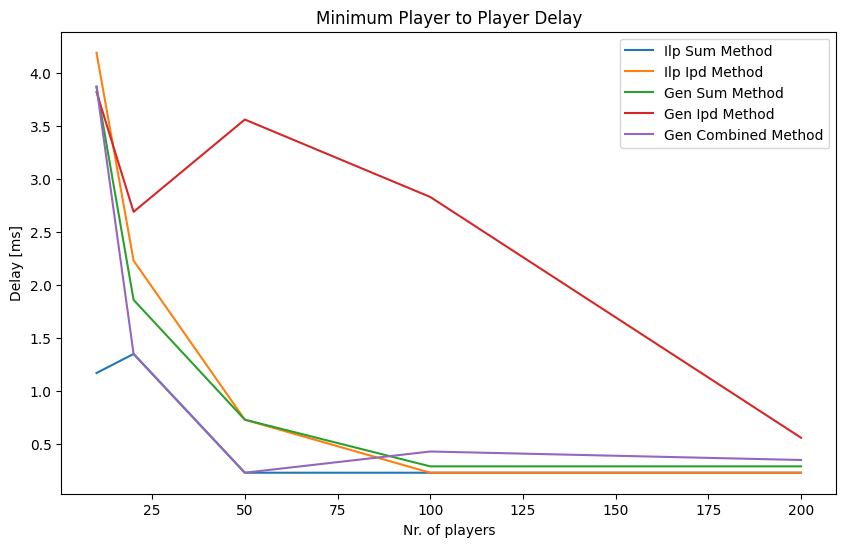

In [34]:
draw_compare_plot(*active_models, df=df_results, x='num_players', x_label='Nr. of players',
                    plot_type='min_player_to_player_delay_', y_label='Delay [ms]',
                    title='Minimum Player to Player Delay', invert=False)

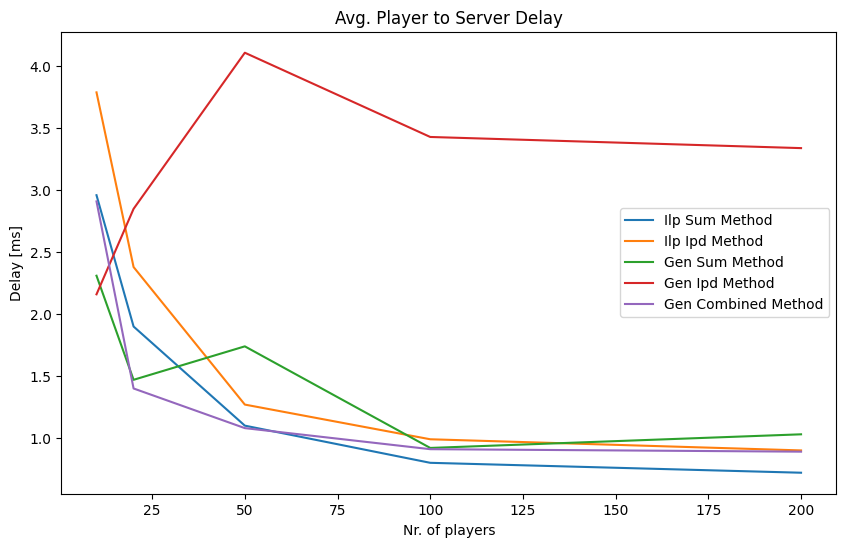

In [38]:
draw_compare_plot(*active_models, df=df_results, x='num_players', x_label='Nr. of players',
                    plot_type='average_player_to_server_delay_', y_label='Delay [ms]',
                    title='Avg. Player to Server Delay', invert=False)

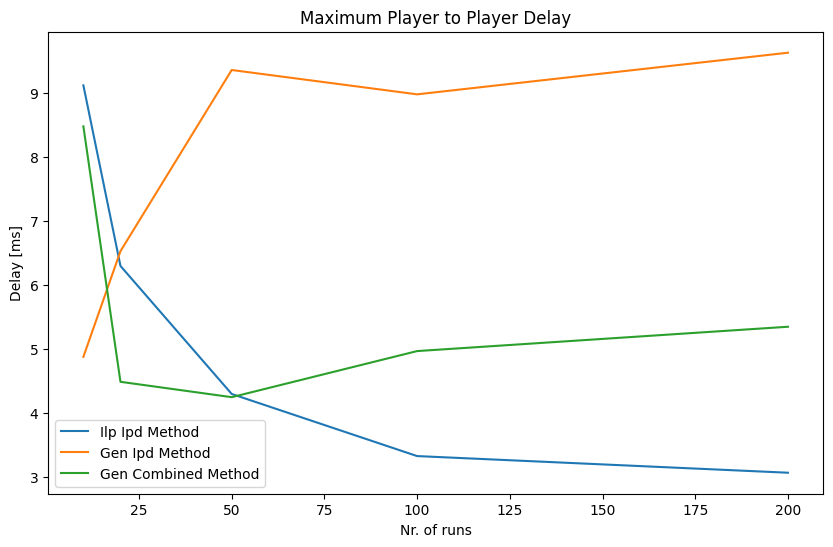

In [30]:
draw_compare_plot(*active_models, df=df_results, x='num_players', x_label='Nr. of runs',
                    plot_type='max_player_to_player_delay_', y_label='Delay [ms]',
                    title='Maximum Player to Player Delay', invert=False)

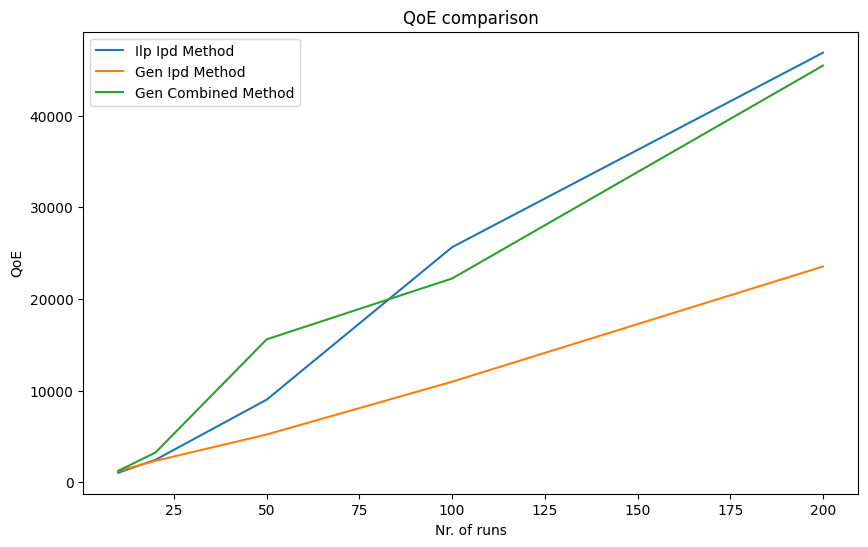

In [31]:
draw_compare_plot(*active_models, df=df_results, x='num_players', x_label='Nr. of runs',
                    plot_type='qoe_score_', y_label='QoE',
                    title='QoE comparison', invert=False)

In [ ]:

file_path = 'saves/20240525102530_usa/usa_ilp_ipd_100/usa_ilp_ipd_100_6_4_25.gml'
draw_graph_from_gml(file_path, "", show_edge_labels=False)

file_path = 'saves/20240525102530_usa/usa_gen_ipd_100/usa_gen_ipd_100_6_4_25.gml'
draw_graph_from_gml(file_path, "", show_edge_labels=False)

# file_path = 'saves/20240523104034_usa/usa_ilp_ipd_20/usa_ilp_ipd_20_3_1_7.gml'
# draw_graph_from_gml(file_path, "", show_edge_labels=False)